In [2]:

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearnex import patch_sklearn
patch_sklearn()  # Enable Intel® Extension for Scikit-learn* optimizations
import warnings
warnings.filterwarnings("ignore")


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [3]:

# ---------------------------------------------------------
# 2. Load Dataset
# ---------------------------------------------------------

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)
print("Target Distribution:\n", y.value_counts())


Dataset Shape: (569, 30)
Target Distribution:
 1    357
0    212
Name: count, dtype: int64


In [4]:

# ---------------------------------------------------------
# 3. Train-Test Split (Same Split for All Models)
# ---------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [5]:

# ---------------------------------------------------------
# 4. Feature Scaling (Required for LR & SVM)
# ---------------------------------------------------------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:

# ---------------------------------------------------------
# 5. Initialize Models
# ---------------------------------------------------------

models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}


In [7]:

# ---------------------------------------------------------
# 6. Train, Predict & Evaluate
# ---------------------------------------------------------

results = []

for name, model in models.items():
    
    # Use scaled data for LR & SVM
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        train_score = model.score(X_train_scaled, y_train)
        test_score = model.score(X_test_scaled, y_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, train_score, test_score, accuracy, precision, recall, f1])


In [8]:

# ---------------------------------------------------------
# 7. Model Comparison Table (Deliverable 1)
# ---------------------------------------------------------

comparison_df = pd.DataFrame(results, columns=[
    "Model",
    "Train Accuracy",
    "Test Accuracy",
    "Accuracy",
    "Precision",
    "Recall",
    "F1 Score"
])

comparison_df = comparison_df.sort_values(by="F1 Score", ascending=False)

print("\nModel Comparison Table:\n")
print(comparison_df)



Model Comparison Table:

                 Model  Train Accuracy  Test Accuracy  Accuracy  Precision  \
0  Logistic Regression        0.989011       0.982456  0.982456   0.986111   
3                  SVM        0.982418       0.982456  0.982456   0.986111   
2        Random Forest        1.000000       0.956140  0.956140   0.958904   
1        Decision Tree        1.000000       0.912281  0.912281   0.955882   

     Recall  F1 Score  
0  0.986111  0.986111  
3  0.986111  0.986111  
2  0.972222  0.965517  
1  0.902778  0.928571  


<Figure size 1000x600 with 0 Axes>

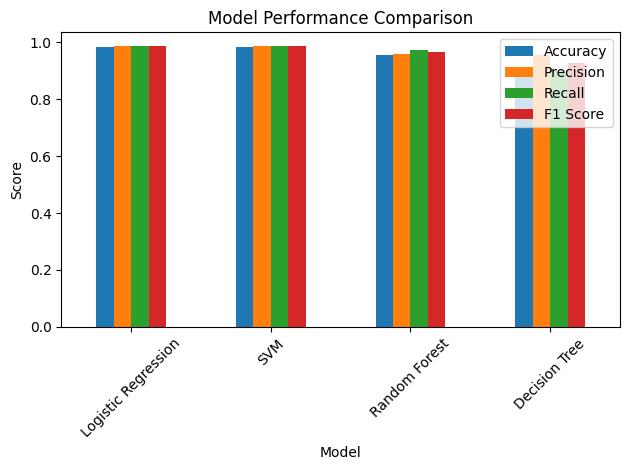

In [9]:

# ---------------------------------------------------------
# 8. Comparison Plot (Deliverable 2)
# ---------------------------------------------------------

plt.figure(figsize=(10,6))

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
comparison_df.set_index("Model")[metrics].plot(kind="bar")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:

# ---------------------------------------------------------
# 9. Detect Overfitting (Train vs Test Comparison)
# ---------------------------------------------------------

print("\nTrain vs Test Accuracy:\n")
print(comparison_df[["Model", "Train Accuracy", "Test Accuracy"]])



Train vs Test Accuracy:

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.989011       0.982456
3                  SVM        0.982418       0.982456
2        Random Forest        1.000000       0.956140
1        Decision Tree        1.000000       0.912281


In [11]:

# ---------------------------------------------------------
# 10. Select & Save Best Model (Deliverable 3)
# ---------------------------------------------------------

best_model_name = comparison_df.iloc[0]["Model"]
print("\nBest Model Selected:", best_model_name)

best_model = models[best_model_name]

# Save scaler if needed
if best_model_name in ["Logistic Regression", "SVM"]:
    joblib.dump(best_model, "best_model.pkl")
    joblib.dump(scaler, "scaler.pkl")
else:
    joblib.dump(best_model, "best_model.pkl")

print("\nBest model saved as 'best_model.pkl'")



Best Model Selected: Logistic Regression

Best model saved as 'best_model.pkl'
